#### J034 Meghna Jayakar Lab 2

4/8/24

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from imblearn.over_sampling import SMOTE

In [33]:
(xtrain, ytrain), (xtest, ytest) = reuters.load_data()

In [34]:
for _ in [xtrain, ytrain, xtest, ytest]:
    print(_.shape)

(8982,)
(8982,)
(2246,)
(2246,)


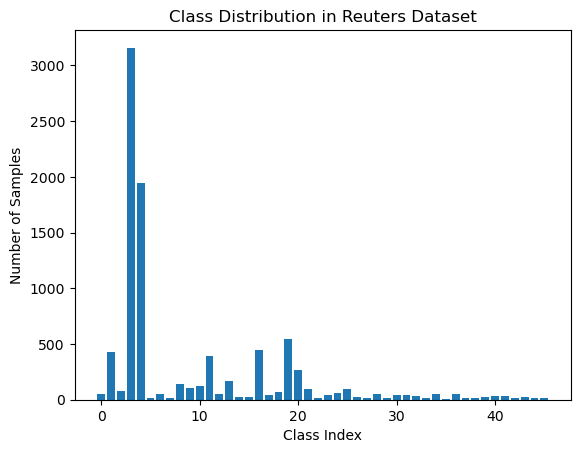

In [35]:
class_distribution = np.bincount(ytrain)
plt.bar(range(len(class_distribution)), class_distribution)
plt.title('Class Distribution in Reuters Dataset')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.show()

In [36]:
max_words = 10000
max_len = 200

In [37]:
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(reuters.get_word_index())

In [38]:
xtrain = tokenizer.sequences_to_matrix(xtrain, mode = 'tfidf')
xtest = tokenizer.sequences_to_matrix(xtest, mode = 'tfidf')

In [39]:
xtrain = pad_sequences(xtrain, maxlen = max_len)
xtest = pad_sequences(xtest, maxlen = max_len)

In [40]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

#### SMOTE to handle Imbalanaced Classes

In [41]:
smote = SMOTE()

In [42]:
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain.argmax(axis = 1))

In [43]:
ytrain_resampled = to_categorical(ytrain_resampled, num_classes = 46)

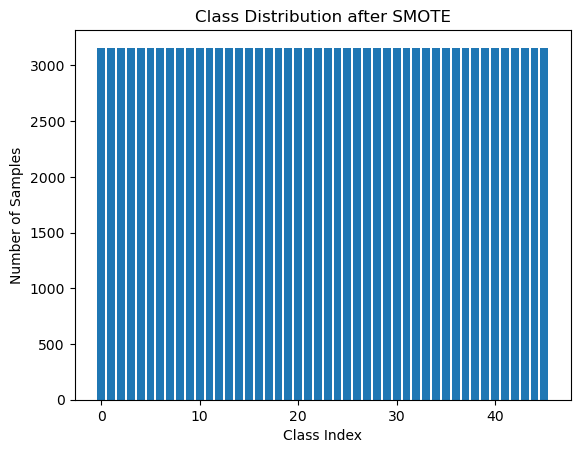

In [44]:
class_distribution_resampled = np.bincount(ytrain_resampled.argmax(axis = 1))
plt.bar(range(len(class_distribution_resampled)), class_distribution_resampled)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.show()

#### Model Creation

In [45]:
model = Sequential([
    Dense(units = 512, activation = 'relu', input_shape = (max_len, )),
    Dense(units = 256, activation = 'relu'),
    Dense(units = 128, activation = 'relu'),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 46, activation = 'softmax')
])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               102912    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 46)                2990      
                                                                 
Total params: 278382 (1.06 MB)
Trainable params: 278382 (1.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
history = model.fit(xtrain_resampled, ytrain_resampled, epochs = 5, batch_size = 32)

Epoch 1/5
4542/4542 [==============================] - 14s 3ms/step - loss: 3.5853 - accuracy: 0.0871
Epoch 2/5
4542/4542 [==============================] - 16s 4ms/step - loss: 3.5342 - accuracy: 0.0932
Epoch 3/5
4542/4542 [==============================] - 16s 4ms/step - loss: 3.5229 - accuracy: 0.0950
Epoch 4/5
4542/4542 [==============================] - 16s 4ms/step - loss: 3.5176 - accuracy: 0.0956
Epoch 5/5
4542/4542 [==============================] - 15s 3ms/step - loss: 3.5156 - accuracy: 0.0963


In [49]:
loss, acc = model.evaluate(xtest, ytest)

71/71 [==============================] - 0s 2ms/step - loss: 4.3353 - accuracy: 0.0276
